<a href="https://colab.research.google.com/github/dimasadhinugroho888/Analisis-Data-Penyakit-Hipertensi-di-Kota-Depok/blob/main/Analisis_Data_Penyakit_Hipertensi_di_Kota_Depok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset berhasil dimuat.
✅ Data telah dibersihkan dan siap dianalisis.

######################################################################

📊 KEY METRICS - RINGKASAN DATA HIPERTENSI KOTA DEPOK (2021-2024)

🏥 Total Penderita Tercatat : 596,088 orang
🔝 Kecamatan Beban Tertinggi: Sukmajaya (102,379 orang)
📈 Tahun dengan Kasus Total Tertinggi: 2021

######################################################################



KeyError: 'jumlah_spm'

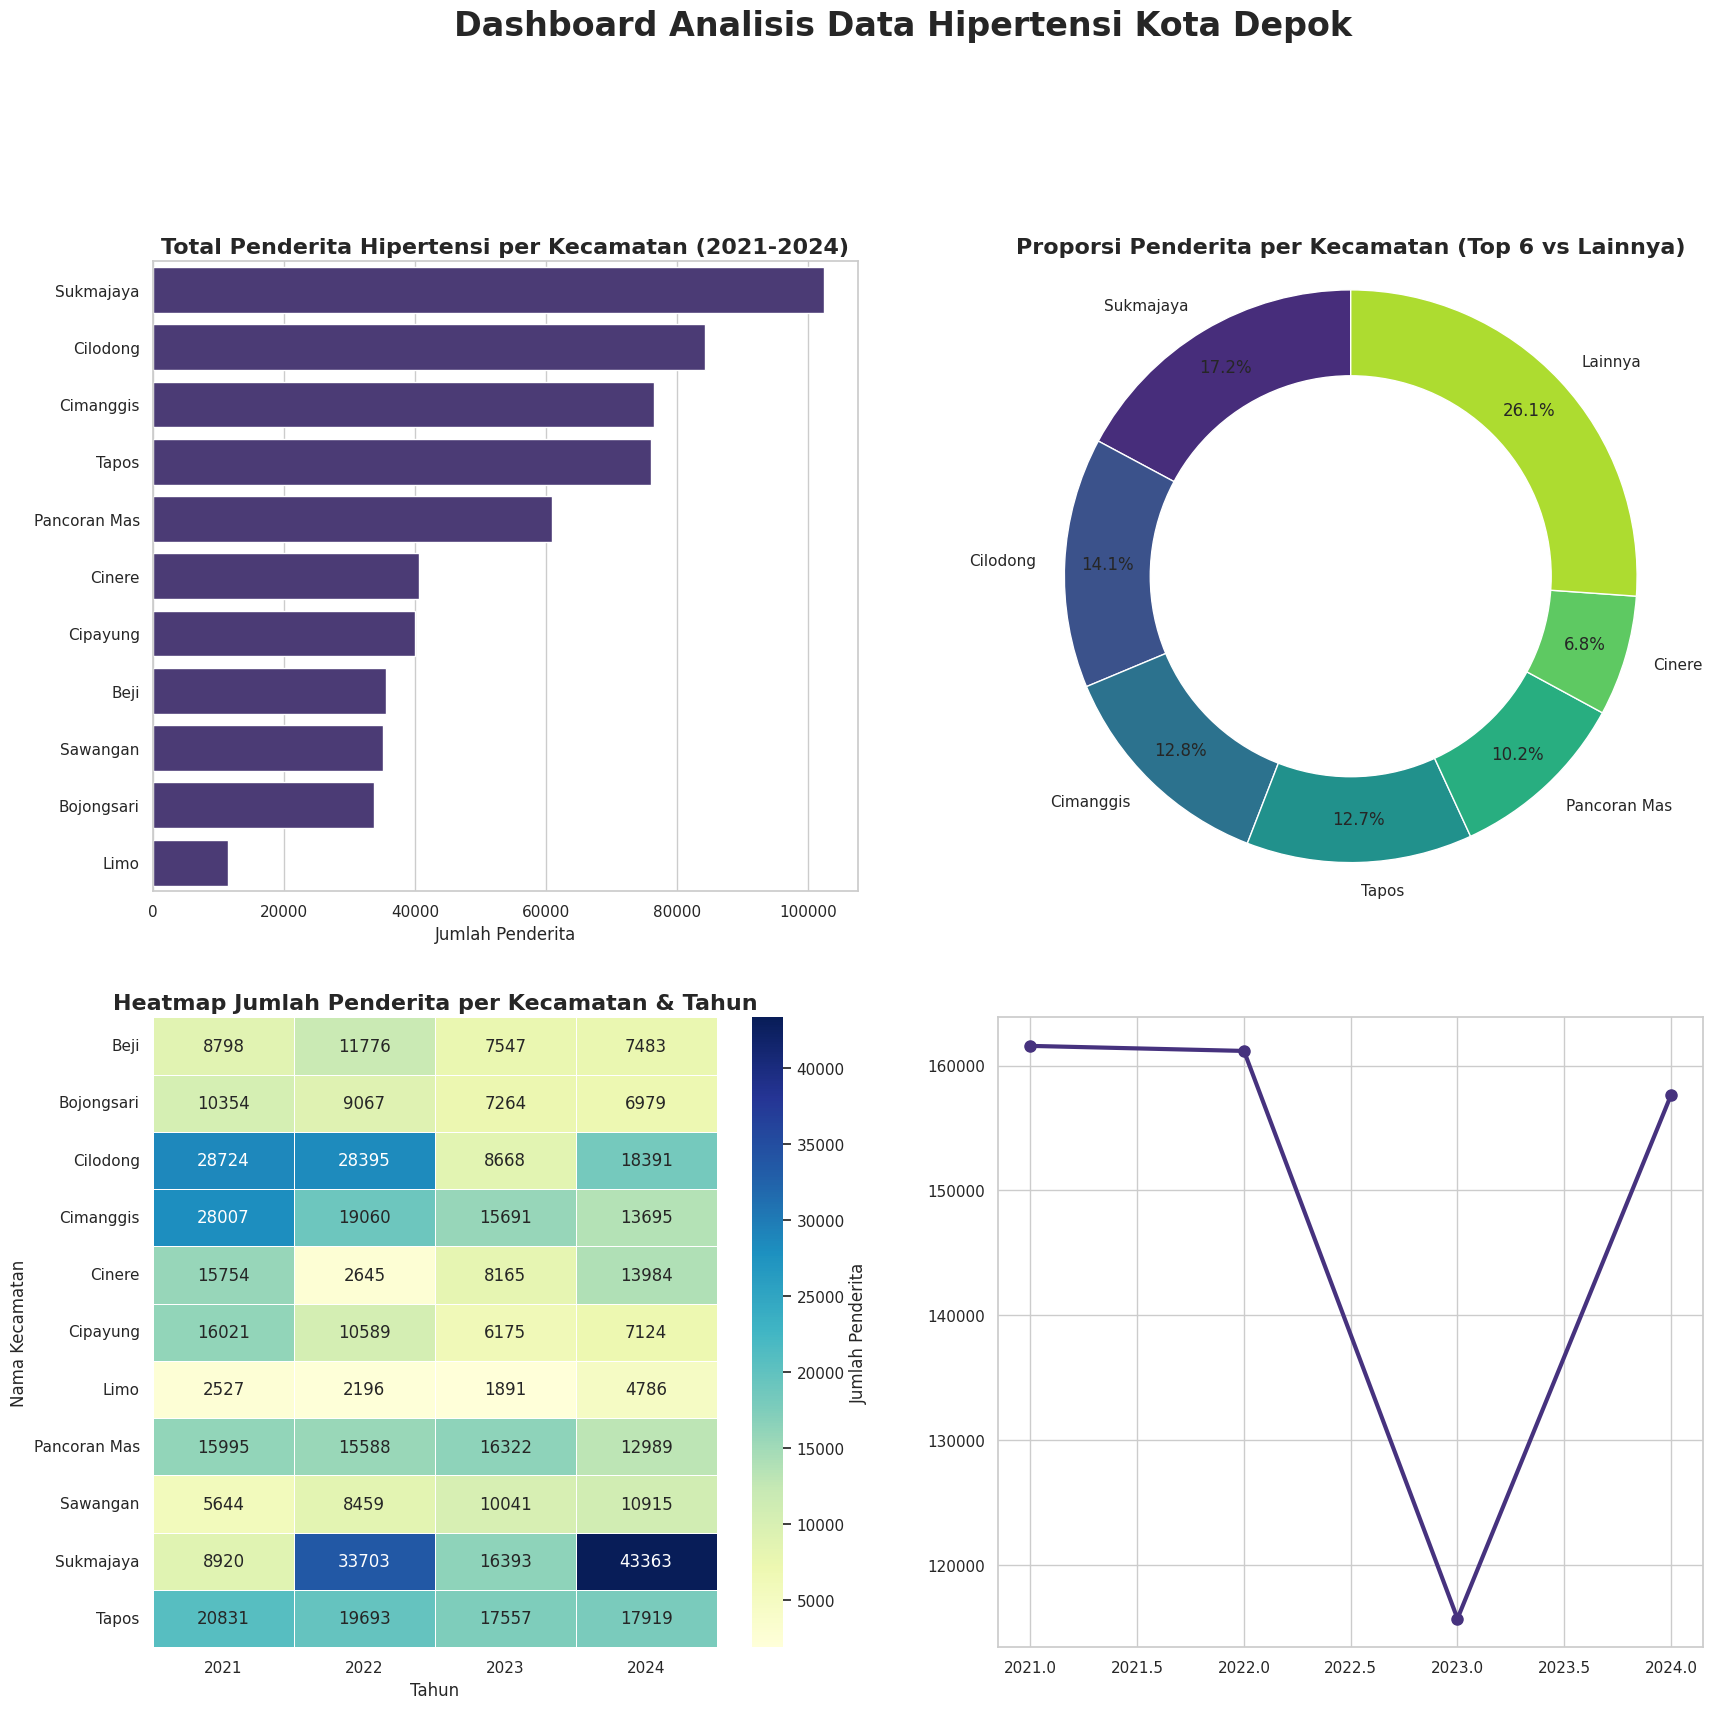

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mengatur tema visualisasi global agar lebih estetik dan konsisten
sns.set_theme(style="whitegrid", palette="viridis")

# --- 1. MEMUAT DAN MEMBERSIHKAN DATA ---

try:
    # Memuat dataset
    df_kecamatan = pd.read_csv('Data_pelayanan_kesehatan_penderita_hipertensi_per_kecamatan.csv')
    df_kota = pd.read_csv('Penyakit_Hipertensi_Kota_Depok.csv')

    print("✅ Dataset berhasil dimuat.")

    # Membersihkan df_kecamatan
    # Menggunakan daftar kolom yang tidak perlu dan menghapus hanya jika ada
    cols_to_drop_kecamatan = [
        'No', 'kode_kabupaten_kota', 'nama_kabupaten_kota', 'kode_instansi',
        'nama_instansi', 'kemendagri_kecamatan_kode', 'bps_kecamatan_kode',
        'nama_data', 'Satuan', 'M'
    ]
    df_kecamatan = df_kecamatan.drop(columns=cols_to_drop_kecamatan, errors='ignore')
    df_kecamatan.rename(columns={'hasil': 'jumlah_penderita'}, inplace=True)

    # Membersihkan df_kota
    cols_to_drop_kota = [
        'No', 'kode_kabupaten_kota', 'nama_kabupaten_kota', 'kode_instansi',
        'nama_instansi', 'nama_data', 'Satuan'
    ]
    df_kota = df_kota.drop(columns=cols_to_drop_kota, errors='ignore')
    df_kota.rename(columns={'Hasil': 'jumlah', 'Kategori': 'kategori'}, inplace=True)

    print("✅ Data telah dibersihkan dan siap dianalisis.")
    print("\n" + "#"*70 + "\n")


except FileNotFoundError:
    print("❌ Error: Pastikan kedua file CSV sudah diunggah ke Google Colab.")

else:
    # --- 2. KPI CARDS - METRIK UTAMA ---

    total_penderita_all_years = df_kecamatan['jumlah_penderita'].sum()
    total_per_kecamatan = df_kecamatan.groupby('nama_kecamatan')['jumlah_penderita'].sum()
    kecamatan_tertinggi = total_per_kecamatan.idxmax()
    nilai_tertinggi = total_per_kecamatan.max()
    tahun_tertinggi_total = df_kecamatan.groupby('Tahun')['jumlah_penderita'].sum().idxmax()

    print("📊 KEY METRICS - RINGKASAN DATA HIPERTENSI KOTA DEPOK (2021-2024)\n")
    print(f"🏥 Total Penderita Tercatat : {total_penderita_all_years:,.0f} orang")
    print(f"🔝 Kecamatan Beban Tertinggi: {kecamatan_tertinggi} ({nilai_tertinggi:,.0f} orang)")
    print(f"📈 Tahun dengan Kasus Total Tertinggi: {tahun_tertinggi_total}")
    print("\n" + "#"*70 + "\n")


    # --- 3. DASHBOARD VISUALISASI DATA ---

    # Menyiapkan data untuk visualisasi
    total_per_kecamatan_sorted = total_per_kecamatan.sort_values(ascending=False)
    heatmap_data = df_kecamatan.pivot_table(index='nama_kecamatan', columns='Tahun', values='jumlah_penderita')

    # Menyiapkan data perbandingan (SPM)
    total_kecamatan_per_tahun = df_kecamatan.groupby('Tahun')['jumlah_penderita'].sum().reset_index()
    data_spm_kota = df_kota[df_kota['kategori'] == 'Standar Pelayanan Minimal (SPM)'][['Tahun', 'jumlah']]
    df_compare = pd.merge(total_kecamatan_per_tahun, data_spm_kota, on='Tahun', suffixes=('_penderita', '_spm'))

    # Membuat layout dashboard 2x2
    fig, axes = plt.subplots(2, 2, figsize=(20, 18))
    fig.suptitle('Dashboard Analisis Data Hipertensi Kota Depok', fontsize=24, weight='bold', y=1.02) # y=1.02 untuk jarak dengan plot

    # Plot 1: Bar Chart - Total Penderita per Kecamatan
    # Menggunakan `color` untuk menghindari FutureWarning dan mendapatkan warna solid yang konsisten
    sns.barplot(
        ax=axes[0, 0],
        x=total_per_kecamatan_sorted.values,
        y=total_per_kecamatan_sorted.index,
        color=sns.color_palette("viridis")[0] # Mengambil warna pertama dari palet
    )
    axes[0, 0].set_title('Total Penderita Hipertensi per Kecamatan (2021-2024)', fontsize=16, weight='bold')
    axes[0, 0].set_xlabel('Jumlah Penderita')
    axes[0, 0].set_ylabel('')

    # Plot 2: Donut Chart - Proporsi Penderita per Kecamatan
    # Pengelompokan kecamatan kecil
    TOP_N = 6
    top_n = total_per_kecamatan_sorted.head(TOP_N)
    others_sum = total_per_kecamatan_sorted.iloc[TOP_N:].sum()
    donut_data = pd.concat([top_n, pd.Series([others_sum], index=['Lainnya'])])

    colors_donut = sns.color_palette('viridis', len(donut_data))
    axes[0, 1].pie(
        donut_data,
        labels=donut_data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors_donut,
        pctdistance=0.85 # Jarak persentase
    )
    # Membuat lubang di tengah untuk Donut Chart
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    axes[0, 1].add_artist(centre_circle)
    axes[0, 1].set_title(f'Proporsi Penderita per Kecamatan (Top {TOP_N} vs Lainnya)', fontsize=16, weight='bold')
    axes[0, 1].axis('equal') # Memastikan bentuk lingkaran

    # Plot 3: Heatmap - Intensitas Penderita per Kecamatan & Tahun
    # Palet 'YlGnBu' sangat cocok untuk heatmap
    sns.heatmap(
        ax=axes[1, 0],
        data=heatmap_data,
        cmap='YlGnBu',
        annot=True,
        fmt=".0f",
        linewidths=.5,
        cbar_kws={'label': 'Jumlah Penderita'}
    )
    axes[1, 0].set_title('Heatmap Jumlah Penderita per Kecamatan & Tahun', fontsize=16, weight='bold')
    axes[1, 0].set_xlabel('Tahun')
    axes[1, 0].set_ylabel('Nama Kecamatan')

    # Plot 4: Line Chart - Perbandingan Total Kecamatan vs Data SPM Kota
    # Menggunakan kolom yang benar dari hasil merge: 'jumlah_penderita' dan 'jumlah_spm'
    axes[1, 1].plot(df_compare['Tahun'], df_compare['jumlah_penderita'], marker='o', linestyle='-', label='Total Penderita Tercatat (Data Kecamatan)', linewidth=3, markersize=8)
    axes[1, 1].plot(df_compare['Tahun'], df_compare['jumlah_spm'], marker='D', linestyle='--', label='Target SPM (Data Kota)', linewidth=3, markersize=8)

    axes[1, 1].set_title('Perbandingan Total Penderita vs. Standar Pelayanan Minimal (SPM)', fontsize=16, weight='bold')
    axes[1, 1].set_xlabel('Tahun', fontsize=12)
    axes[1, 1].set_ylabel('Jumlah Orang', fontsize=12)
    axes[1, 1].legend(loc='upper left', fontsize=10)
    axes[1, 1].grid(axis='y', linestyle='--')
    axes[1, 1].ticklabel_format(style='plain', axis='y') # Menghindari notasi saintifik jika angkanya terlalu besar

    # Menampilkan dashboard
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Menyesuaikan layout agar judul tidak terpotong
    plt.show()

    # --- 4. VISUALISASI TAMBAHAN (AGREGAT KOTA) ---
    print("\n" + "#"*70 + "\n")
    print("VISUALISASI TAMBAHAN UNTUK ANALISIS DETAIL\n")

    # Visualisasi Agregat kota per kategori layanan
    agregat_kota = df_kota.groupby(['Tahun', 'kategori'])['jumlah'].sum().unstack()

    fig_bar, ax_bar = plt.subplots(figsize=(14, 8)) # Membuat figur dan axis secara eksplisit
    agregat_kota.plot(kind='bar', width=0.8, ax=ax_bar)

    plt.title('Jumlah Kasus Hipertensi di Kota Depok Berdasarkan Kategori Layanan (2021-2024)', fontsize=16, weight='bold')
    plt.ylabel('Jumlah (Angka Kunjungan/Orang)', fontsize=12)
    plt.xlabel('Tahun', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Kategori Layanan', fontsize=10, title_fontsize=12)

    # Menambahkan label nilai di atas setiap bar (Opsional, tapi membantu)
    for container in ax_bar.containers:
        ax_bar.bar_label(container, fmt='%.0f', padding=5, fontsize=9)

    plt.tight_layout()
    plt.show()
